# Support Vector Machines
## Fernando Delgado - Homework 5

1. This problem involves hyperplanes in two dimensions.

Sketch the hyperplane 1 + 3X1 − X2 = 0. Indicate the set of
points for which 1 + 3X1 − X2 > 0, as well as the set of points
for which 1 + 3X1 − X2 < 0.

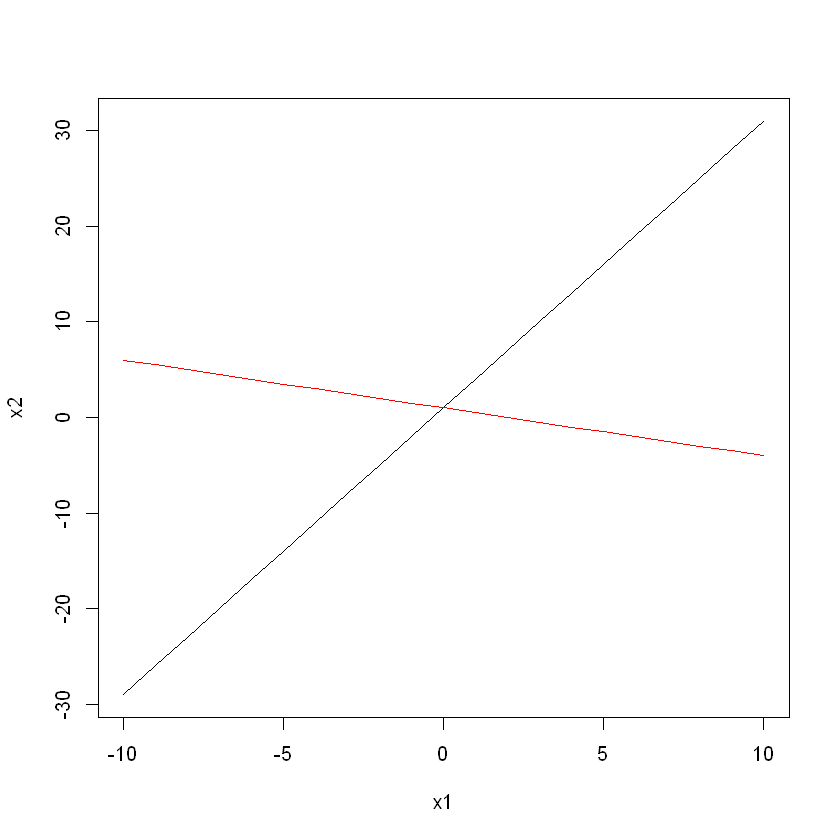

In [4]:
x1 <- -10:10
x2 <- 1 + 3 * x1
plot(x1, x2, type = "l", col = "black")
lines(x1, 1 - x1/2, col = "red")

On the same plot, sketch the hyperplane −2 + X1 + 2X2 = 0.
Indicate the set of points for which −2+ X1 +2X2 > 0, as well
as the set of points for which −2+ X1 + 2X2 < 0.

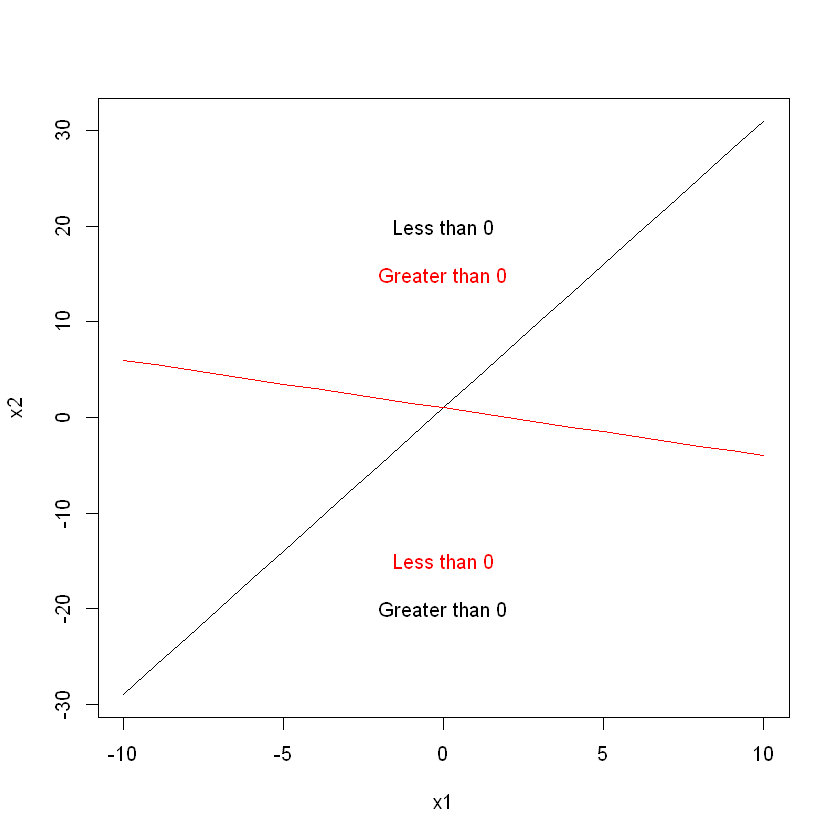

In [6]:
plot(x1, x2, type = "l", col = "black")
text(c(0), c(-20), "Greater than 0", col = "black")
text(c(0), c(20), "Less than 0", col = "black")
lines(x1, 1 - x1/2, col = "red")
text(c(0), c(-15), "Less than 0", col = "red")
text(c(0), c(15), "Greater than 0", col = "red")

2. We have seen that in p = 2 dimensions, a linear decision boundary
takes the form β0+β1X1+β2X2 = 0.We now investigate a non-linear
decision boundary.

(a) Sketch the curve
(1 + X1)2 + (2 − X2)2 = 4.

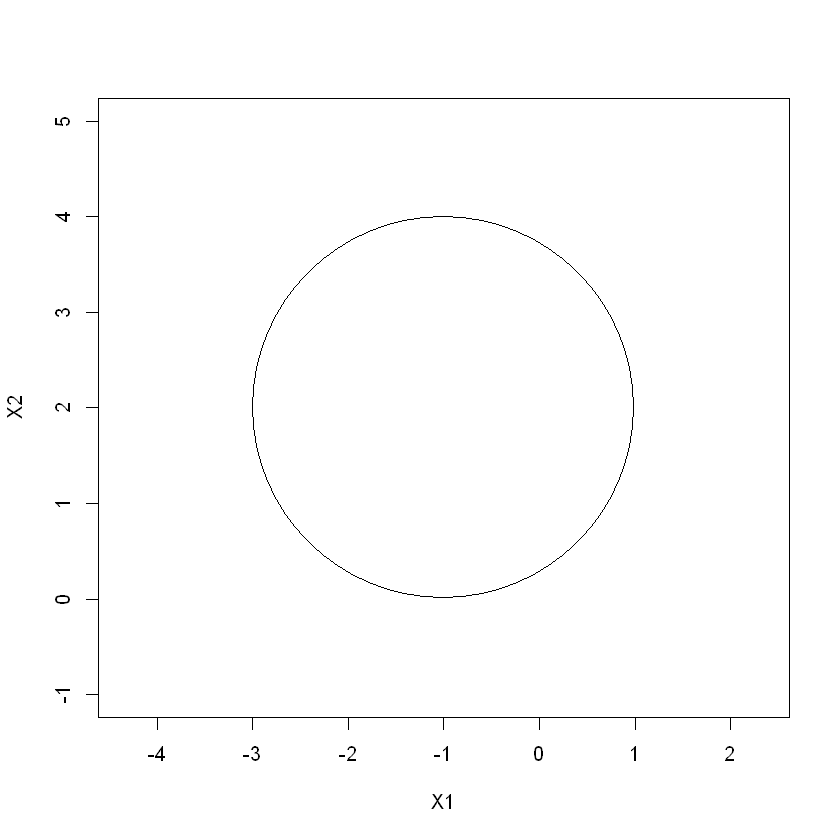

In [8]:
plot(NA, NA, type = "n", 
     xlim = c(-4, 2), 
     ylim = c(-1, 5), 
     asp = 1, xlab = "X1", 
     ylab = "X2")

symbols(c(-1), 
        c(2), 
        circles = c(2), 
        add = TRUE, 
        inches = FALSE)

(b) On your sketch, indicate the set of points for which
(1 + X1)2 + (2 − X2)2 > 4,

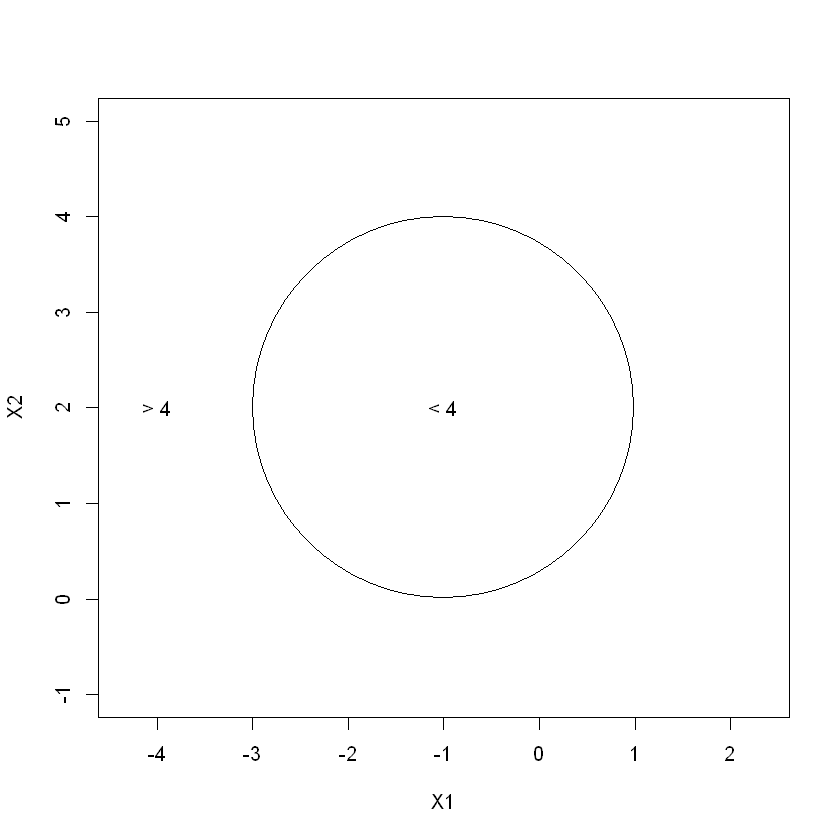

In [9]:
plot(NA, NA, 
     type = "n", 
     xlim = c(-4, 2), 
     ylim = c(-1, 5), 
     asp = 1, 
     xlab = "X1", 
     ylab = "X2")

symbols(c(-1), 
        c(2), 
        circles = c(2), 
        add = TRUE, 
        inches = FALSE)

text(c(-1), c(2), "< 4")
text(c(-4), c(2), "> 4")

4. Generate a simulated two-class data set with 100 observations and
two features in which there is a visible but non-linear separation between
the two classes. Show that in this setting, a support vector
machine with a polynomial kernel (with degree greater than 1) or a
radial kernel will outperform a support vector classifier on the training
data. Which technique performs best on the test data? Make
plots and report training and test error rates in order to back up
your assertions.

In [14]:
library(e1071)
set.seed(123)

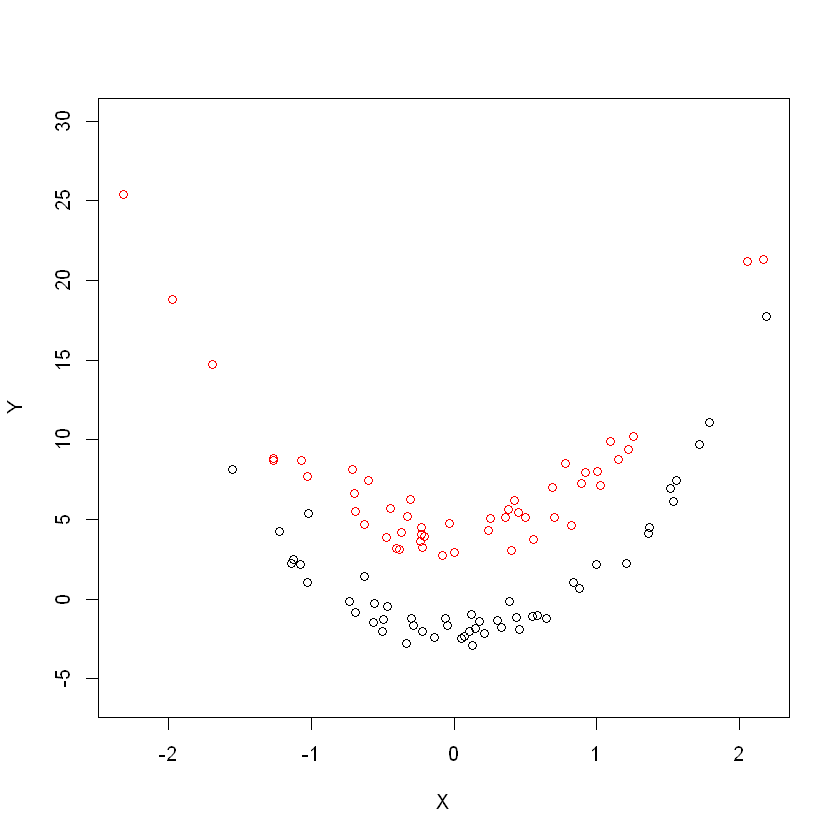

In [15]:
x <- rnorm(100)
y <- 4 * x^2 + 1 + rnorm(100)
class <- sample(100, 50)
y[class] <- y[class] + 3
y[-class] <- y[-class] - 3
plot(x[class], y[class], col = "red", xlab = "X", ylab = "Y", ylim = c(-6, 30))
points(x[-class], y[-class], col = "black")

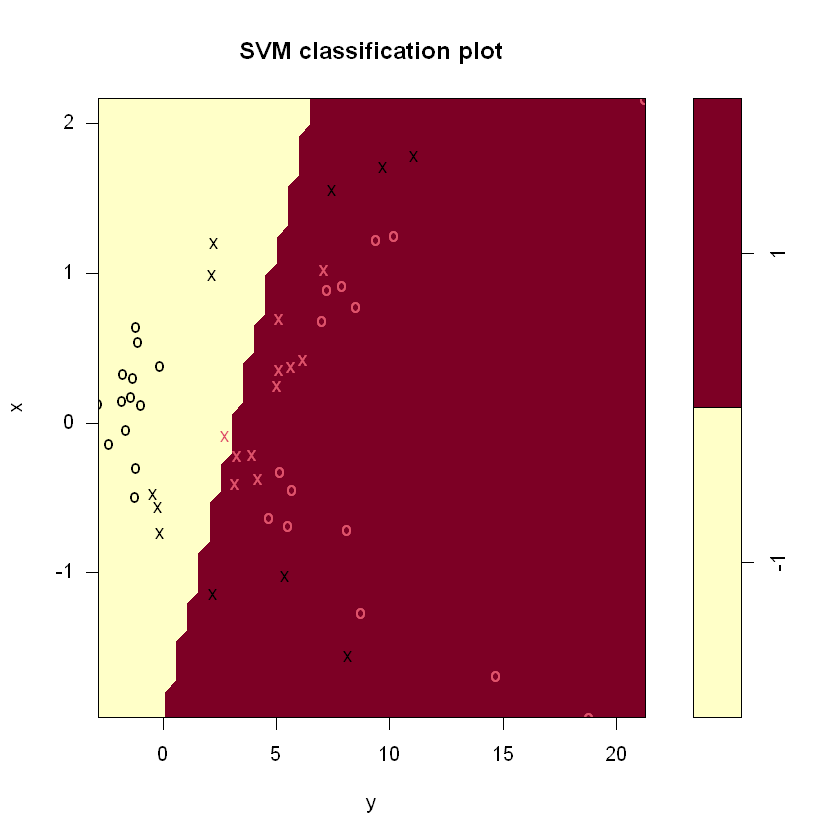

In [16]:
#this plots are taken from: https://rstudio-pubs-static.s3.amazonaws.com/65566_a44a67a726284943b8f1ec986bf9642d.html
z <- rep(-1, 100)
z[class] <- 1
data <- data.frame(x = x, y = y, z = as.factor(z))
train <- sample(100, 50)
data.train <- data[train, ]
data.test <- data[-train, ]
svm.linear <- svm(z ~ ., data = data.train, kernel = "linear", cost = 10)
plot(svm.linear, data.train)

In [17]:
table(predict = predict(svm.linear, data.train), truth = data.train$z)

       truth
predict -1  1
     -1 18  1
     1   6 25

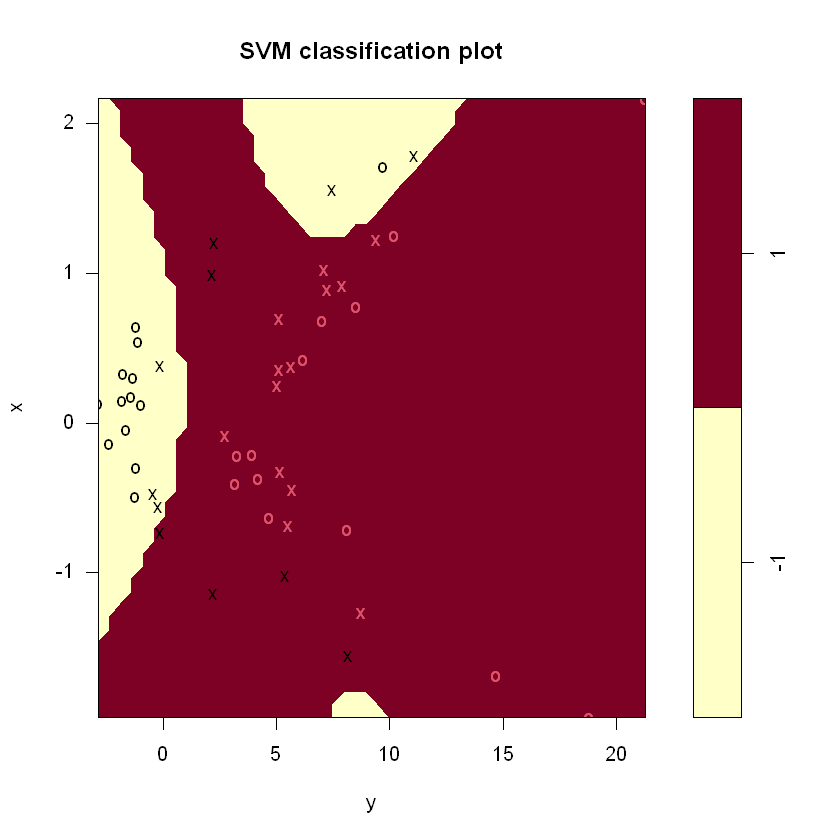

In [18]:
svm.poly <- svm(z ~ ., data = data.train, kernel = "polynomial", cost = 10)
plot(svm.poly, data.train)

In [19]:
table(predict = predict(svm.poly, data.train), truth = data.train$z)

       truth
predict -1  1
     -1 18  0
     1   6 26

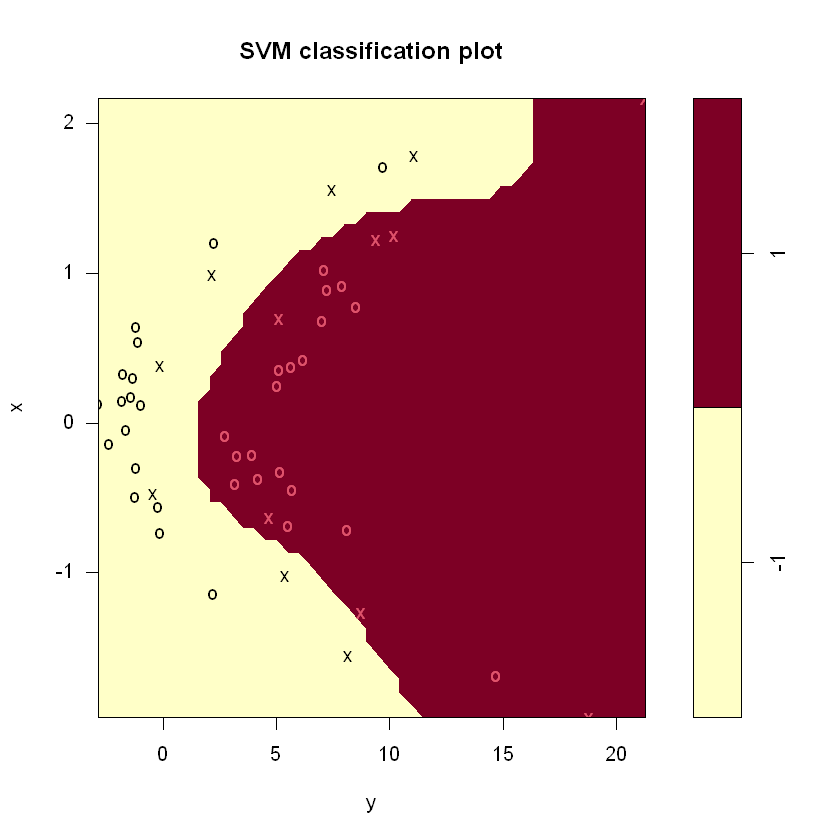

In [20]:
svm.radial <- svm(z ~ ., data = data.train, kernel = "radial", gamma = 1, cost = 10)
plot(svm.radial, data.train)

7. In this problem, you will use support vector approaches in order to
predict whether a given car gets high or low gas mileage based on the
Auto data set.

a) Create a binary variable that takes on a 1 for cars with gas
mileage above the median, and a 0 for cars with gas mileage
below the median.

In [23]:
library(ISLR)

In [24]:
var <- ifelse(Auto$mpg > median(Auto$mpg), 1, 0)
Auto$mpglevel <- as.factor(var)

b) Fit a support vector classifier to the data with various values
of cost, in order to predict whether a car gets high or low gas
mileage. Report the cross-validation errors associated with different
values of this parameter. Comment on your results.

In [25]:
set.seed(123)

In [26]:
tune.out <- tune(svm, mpglevel ~ ., data = Auto, kernel = "linear", 
                 ranges = list(cost = c(0.01, 0.1, 1, 5, 10, 100, 1000)))

summary(tune.out)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost
    1

- best performance: 0.01025641 

- Detailed performance results:
   cost      error dispersion
1 1e-02 0.07634615 0.03928191
2 1e-01 0.04333333 0.03191738
3 1e+00 0.01025641 0.01792836
4 5e+00 0.01538462 0.01792836
5 1e+01 0.01788462 0.01727588
6 1e+02 0.03320513 0.02720447
7 1e+03 0.03320513 0.02720447


c) Now repeat (b), this time using SVMs with radial and polynomial
basis kernels, with different values of gamma and degree and
cost. Comment on your results.

In [28]:
tune.out <- tune(svm, mpglevel ~ ., 
                 data = Auto, kernel = "polynomial", 
                 ranges = list(cost = c(0.01, 0.1, 1, 5, 10, 100), 
                               degree = c(2, 3, 4)))

summary(tune.out)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost degree
  100      2

- best performance: 0.3060256 

- Detailed performance results:
    cost degree     error dispersion
1  1e-02      2 0.5432692 0.03792028
2  1e-01      2 0.5432692 0.03792028
3  1e+00      2 0.5432692 0.03792028
4  5e+00      2 0.5432692 0.03792028
5  1e+01      2 0.4867949 0.10893966
6  1e+02      2 0.3060256 0.07775911
7  1e-02      3 0.5432692 0.03792028
8  1e-01      3 0.5432692 0.03792028
9  1e+00      3 0.5432692 0.03792028
10 5e+00      3 0.5432692 0.03792028
11 1e+01      3 0.5432692 0.03792028
12 1e+02      3 0.3416667 0.06934674
13 1e-02      4 0.5432692 0.03792028
14 1e-01      4 0.5432692 0.03792028
15 1e+00      4 0.5432692 0.03792028
16 5e+00      4 0.5432692 0.03792028
17 1e+01      4 0.5432692 0.03792028
18 1e+02      4 0.5432692 0.03792028


d) Make some plots to back up your assertions in (b) and (c).

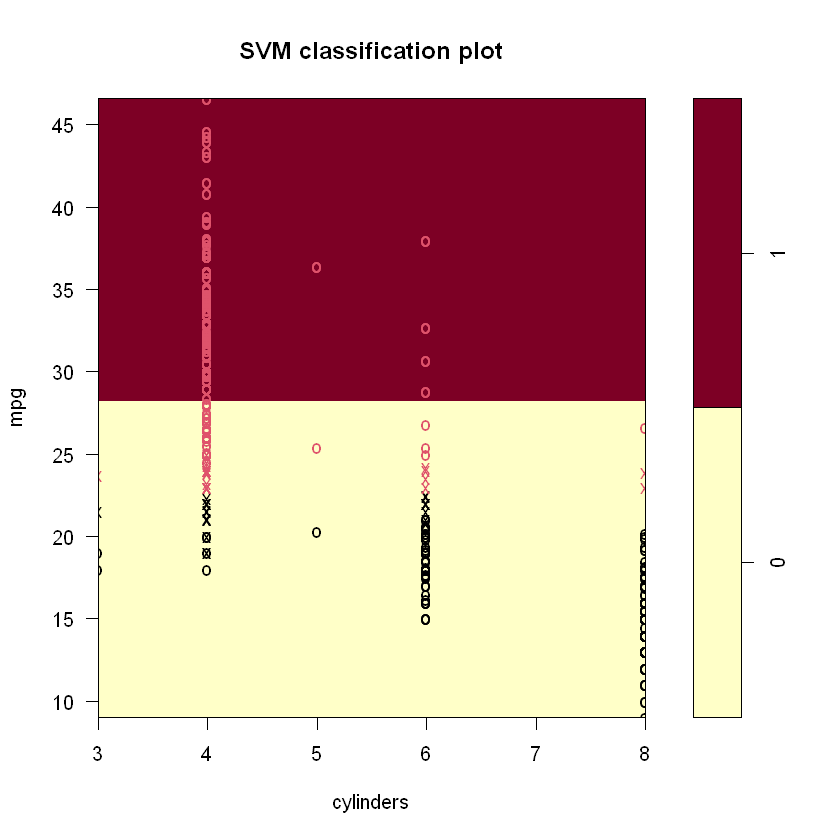

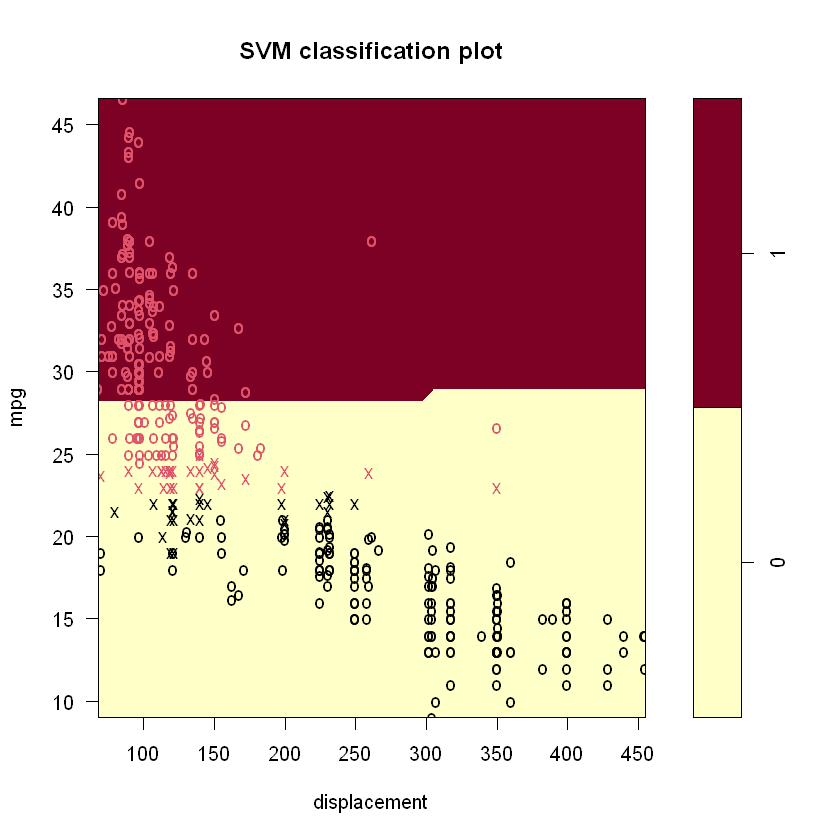

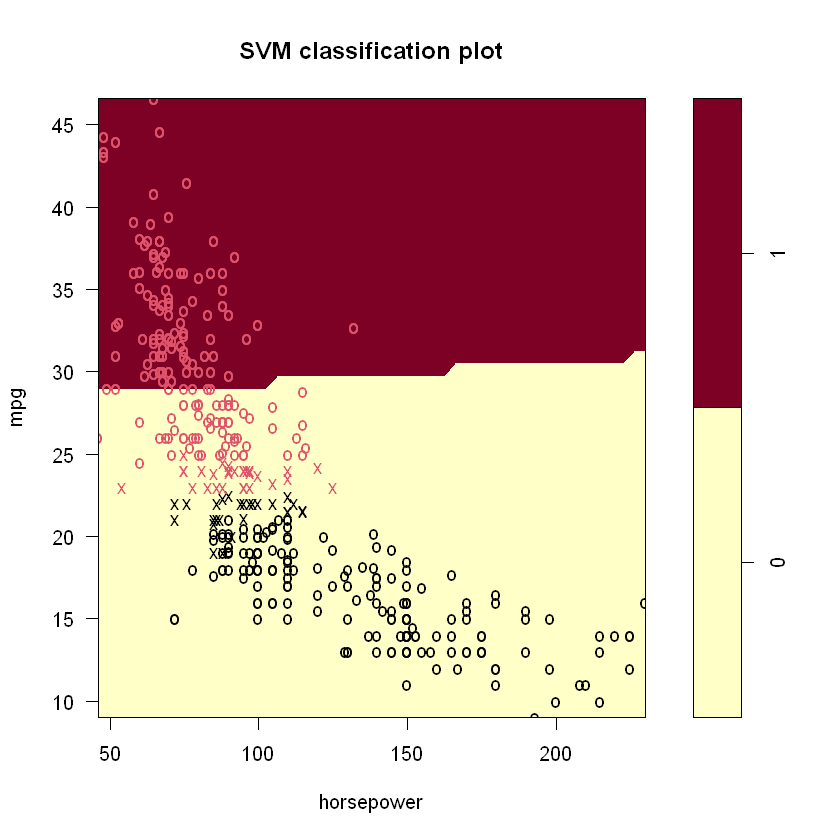

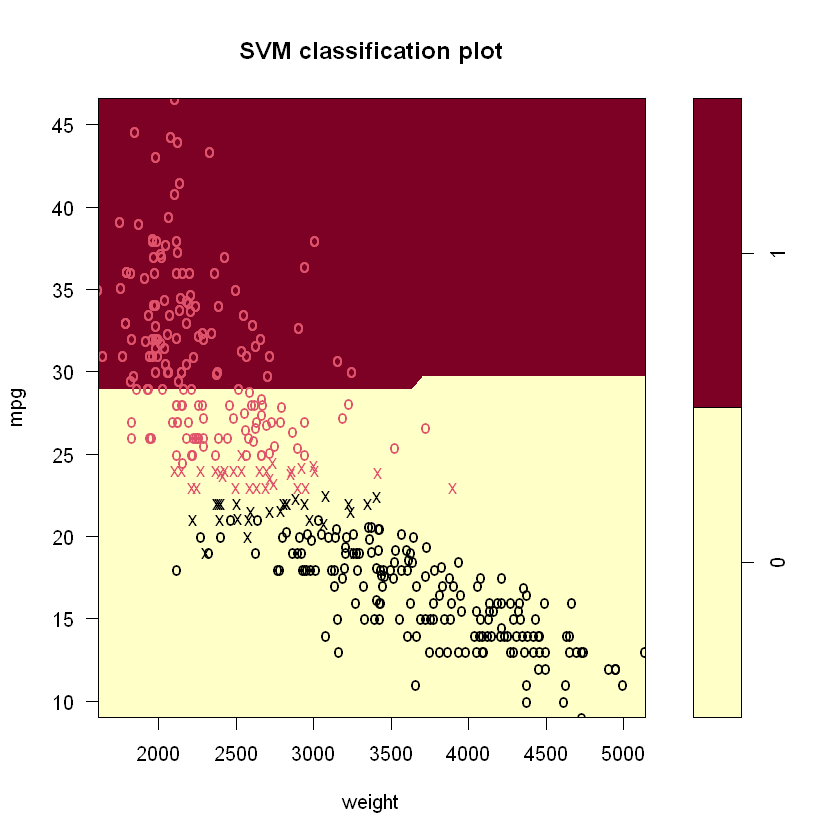

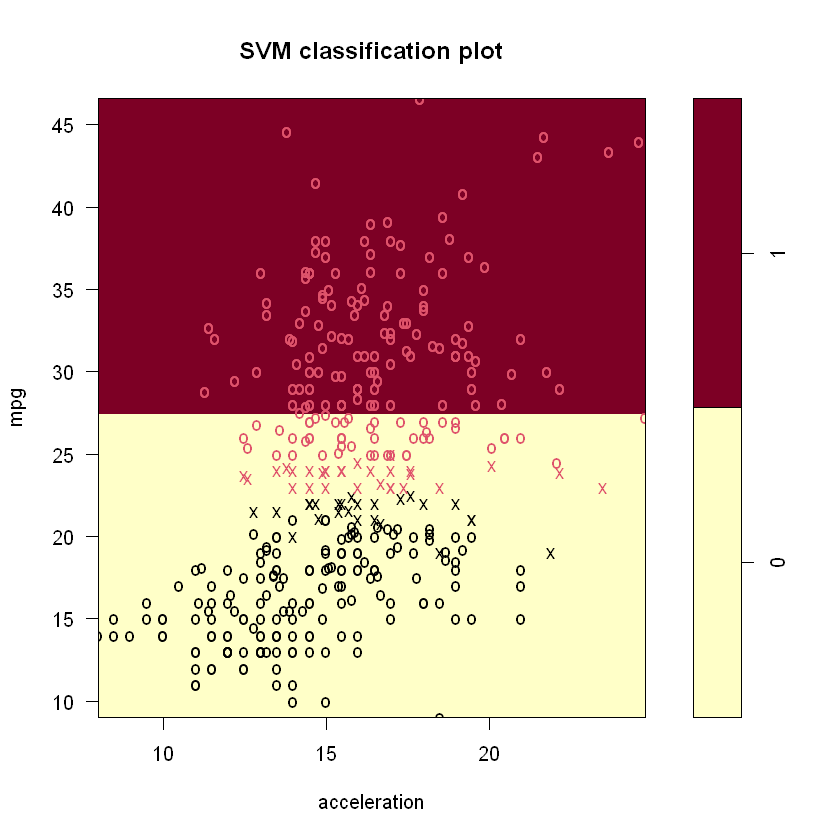

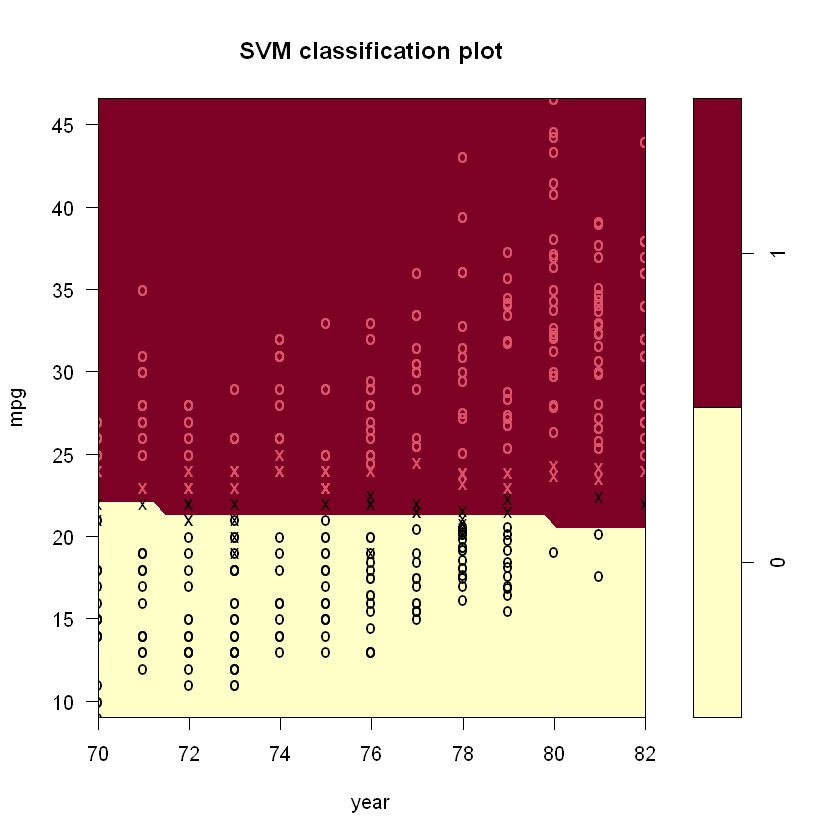

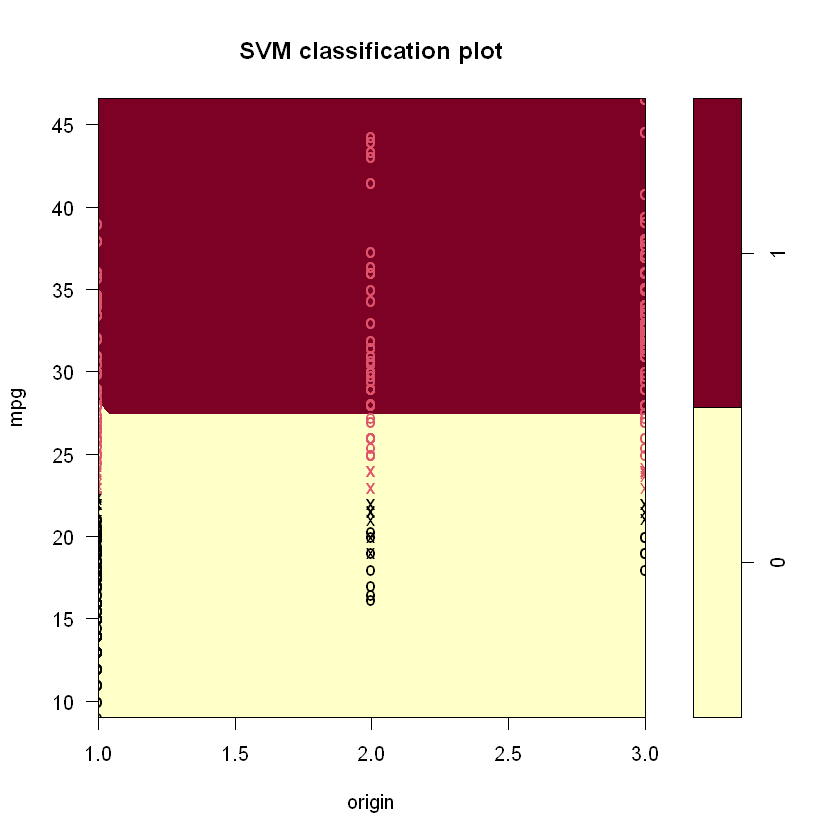

In [29]:
svm.linear <- svm(mpglevel ~ ., data = Auto, kernel = "linear", cost = 1)

svm.poly <- svm(mpglevel ~ ., data = Auto, kernel = "polynomial", cost = 100, degree = 2)

svm.radial <- svm(mpglevel ~ ., data = Auto, kernel = "radial", cost = 100, gamma = 0.01)


#this is taken from: https://rstudio-pubs-static.s3.amazonaws.com/65566_a44a67a726284943b8f1ec986bf9642d.html
plotpairs = function(fit) {
    for (name in names(Auto)[!(names(Auto) %in% c("mpg", "mpglevel", "name"))]) {
        plot(fit, Auto, as.formula(paste("mpg~", name, sep = "")))
    }
}
plotpairs(svm.linear)

8. This problem involves the OJ data set which is part of the ISLR
package.

In [30]:
set.seed(123)

a) Create a training set containing a random sample of 800
observations, and a test set containing the remaining
observations.

In [31]:
train <- sample(nrow(OJ), 800)
OJ.train <- OJ[train, ]
OJ.test <- OJ[-train, ]

b) Fit a support vector classifier to the training data using
cost=0.01, with Purchase as the response and the other variables
as predictors. Use the summary() function to produce summary
statistics, and describe the results obtained.

In [32]:
svm.linear <- svm(Purchase ~ ., data = OJ.train, kernel = "linear", cost = 0.01)
summary(svm.linear)


Call:
svm(formula = Purchase ~ ., data = OJ.train, kernel = "linear", cost = 0.01)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  0.01 

Number of Support Vectors:  442

 ( 220 222 )


Number of Classes:  2 

Levels: 
 CH MM




c) What are the training and test error rates?

In [33]:
train.pred <- predict(svm.linear, OJ.train)
table(OJ.train$Purchase, train.pred)

    train.pred
      CH  MM
  CH 426  61
  MM  71 242

In [35]:
test.pred <- predict(svm.linear, OJ.test)
table(OJ.test$Purchase, test.pred)

    test.pred
      CH  MM
  CH 145  21
  MM  27  77

In [36]:
(27 + 21) / (145 + 77 + 27 + 21)

[1] 0.1777778

d) Use the tune() function to select an optimal cost. Consider values
in the range 0.01 to 10.

In [37]:
tune.out <- tune(svm, Purchase ~ ., 
                 data = OJ.train, kernel = "linear", 
                 ranges = list(cost = 10^seq(-2, 1, by = 0.25)))

summary(tune.out)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
     cost
 5.623413

- best performance: 0.16375 

- Detailed performance results:
          cost   error dispersion
1   0.01000000 0.17625 0.03143004
2   0.01778279 0.17000 0.03496029
3   0.03162278 0.16875 0.03498512
4   0.05623413 0.16750 0.03343734
5   0.10000000 0.17250 0.03425801
6   0.17782794 0.17500 0.03435921
7   0.31622777 0.17250 0.03574602
8   0.56234133 0.17125 0.03438447
9   1.00000000 0.16875 0.03596391
10  1.77827941 0.16750 0.03593976
11  3.16227766 0.16500 0.02934469
12  5.62341325 0.16375 0.02972676
13 10.00000000 0.17250 0.02751262


e) Compute the training and test error rates using this new value
for cost.

In [38]:
svm.linear <- svm(Purchase ~ ., kernel = "linear", data = OJ.train, cost = tune.out$best.parameter$cost)
train.pred <- predict(svm.linear, OJ.train)

table(OJ.train$Purchase, train.pred)

    train.pred
      CH  MM
  CH 427  60
  MM  68 245

In [39]:
(68 + 60) / (427 + 245 + 68 + 60)

[1] 0.16

In [40]:
test.pred <- predict(svm.linear, OJ.test)
table(OJ.test$Purchase, test.pred)

    test.pred
      CH  MM
  CH 147  19
  MM  26  78

In [41]:
(26 + 19) / (147 + 78 + 26 + 19)

[1] 0.1666667

f) Repeat parts (b) through (e) using a support vector machine
with a radial kernel. Use the default value for gamma.

In [42]:
svm.radial <- svm(Purchase ~ ., kernel = "radial", data = OJ.train)

summary(svm.radial)


Call:
svm(formula = Purchase ~ ., data = OJ.train, kernel = "radial")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  367

 ( 181 186 )


Number of Classes:  2 

Levels: 
 CH MM




In [43]:
train.pred <- predict(svm.radial, OJ.train)

table(OJ.train$Purchase, train.pred)

    train.pred
      CH  MM
  CH 446  41
  MM  70 243

In [44]:
(70 + 41) / (446 + 243 + 70 + 41)

[1] 0.13875

In [45]:
test.pred <- predict(svm.radial, OJ.test)

table(OJ.test$Purchase, test.pred)

    test.pred
      CH  MM
  CH 149  17
  MM  34  70

In [47]:
(34 + 17) / (149 + 70 + 34 + 17)

[1] 0.1888889